In [14]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
import sys
import os
import plotly.express as px
import plotly.graph_objects as go
import squarify
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path
from src.utils import visualization_utils

In [15]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_kingdom_class.csv")
df = pd.read_csv(file_path)
df

,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,Code,Name,kingdom,LineageTaxIDs,Rank,FullLineage,FullLineageTaxIDs,FullLineageRanks,class
0,UniRef90_D6NXI8,11676,ADF86160.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
1,UniRef90_L0BZL1,11676,AFZ96186.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
2,UniRef90_D6NXI9,11676,ADF86161.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
3,UniRef90_A0A023HQ48,28875,AGO66969.1,['Homo sapiens'],Homo sapiens,Rotavirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
4,UniRef90_L0BZL4,11676,AFZ95585.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348396,UniRef90_A0A158WYC0,1803956,AJS09545.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
348397,UniRef90_A0A158WZ44,1803956,AJS09547.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
348398,UniRef90_A0A158WZ60,1803956,AJS09567.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia
348399,UniRef90_A0A158X2K2,1803956,AJS09541.1,['Homo sapiens'],Homo sapiens,Parechovirus A,species,9606,species,9606,Homo sapiens,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33511;7711;...,cellular root;domain;clade;kingdom;clade;clade...,Mammalia


In [3]:
df[df["kingdom"].isna()][["virus_host_name", "virus_host_tax_id"]]

,virus_host_name,virus_host_tax_id
565,Blechomonas maslovi,1463231
619,Blechomonas maslovi,1463231
627,Blechomonas juanalfonzi,1463344
635,Blechomonas maslovi,1463231
642,Blechomonas juanalfonzi,1463344
...,...,...
337681,Acanthamoeba castellanii,5755
337682,Acanthamoeba castellanii,5755
337683,Acanthamoeba castellanii,5755
339009,Acanthamoeba polyphaga,5757


In [4]:
print(df[df["kingdom"].isna()]["virus_host_tax_id"].nunique())
df[df["kingdom"].isna()]["virus_host_tax_id"].unique()

56


array([1463231, 1463344, 1463346,    5755,   89336,  156174,    5757,
        309355,    4779,  157538,   32644,    4781,    5664,    2843,
         29199,    2829,  426638,    5722,    5670,    2856,  749232,
        216802,  471275,  426634,    5756,    5802, 1580590,   33659,
        143451,    4792,  115547,   33658,    5778,    5684, 2675857,
          4787, 1504291,   37319, 2054051,    5666, 1390974,   33649,
          5660,   97485,  127563, 1972851, 1892383,   82942, 1489738,
       1869227, 3068826,    2903,   87148,  122233, 1382994,   40385])

In [5]:
df[df["kingdom"].isna()]["kingdom"] = "Unknown"

/tmp/ipykernel_743136/2998101009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["kingdom"].isna()]["kingdom"] = "Unknown"


In [6]:
df["kingdom"].unique()

array(['Metazoa', 'Viridiplantae', 'Pseudomonadati', 'Bacillati', 'Fungi',
       nan, 'Methanobacteriati', 'Thermoproteati', 'Fusobacteriati',
       'Thermotogati', 'Orthornavirae'], dtype=object)

In [7]:
agg_df = df[["uniref90_id", "kingdom", "class"]].groupby(["kingdom", "class"]).count().reset_index().rename(columns={"uniref90_id": "count"})
agg_df

,kingdom,class,count
0,Bacillati,Actinomycetes,2111
1,Bacillati,Bacilli,6703
2,Bacillati,Clostridia,366
3,Bacillati,Cyanophyceae,3443
4,Bacillati,Erysipelotrichia,9
...,...,...,...
84,Viridiplantae,Mamiellophyceae,139
85,Viridiplantae,Pinopsida,17
86,Viridiplantae,Polypodiopsida,4
87,Viridiplantae,Trebouxiophyceae,1768


In [8]:
agg_df["kingdom"].unique(

array(['Bacillati', 'Fungi', 'Fusobacteriati', 'Metazoa',
       'Methanobacteriati', 'Orthornavirae', 'Pseudomonadati',
       'Thermoproteati', 'Thermotogati', 'Viridiplantae'], dtype=object)

['Actinomycetes\n2111 (16.69%)', 'Bacilli\n6703 (53.00%)', 'Clostridia\n366 (2.89%)', 'Cyanophyceae\n3443 (27.23%)', '', '']
['Agaricomycetes\n364 (22.13%)', '', 'Dothideomycetes\n170 (10.33%)', 'Entomophthoromycetes\n12 (0.73%)', 'Eurotiomycetes\n44 (2.67%)', 'Glomeromycetes\n13 (0.79%)', '', 'Leotiomycetes\n648 (39.39%)', '', '', 'Mucoromycetes\n13 (0.79%)', 'Pezizomycetes\n18 (1.09%)', '', 'Pucciniomycetes\n65 (3.95%)', '', 'Sordariomycetes\n274 (16.66%)', '', '']
['Fusobacteriia\n1 (100.00%)']
['Candidatus Nanohaloarchaea\n5 (2.15%)', 'Halobacteria\n64 (27.47%)', 'Methanobacteria\n76 (32.62%)', 'Methanomicrobia\n88 (37.77%)']
['Stelpaviricetes\n1 (100.00%)']
['Alphaproteobacteria\n1923 (6.43%)', '', '', '', 'Betaproteobacteria\n1858 (6.22%)', '', '', 'Epsilonproteobacteria\n284 (0.95%)', 'Flavobacteriia\n771 (2.58%)', 'Gammaproteobacteria\n24715 (82.68%)', '', '']
['Thermoprotei\n642 (100.00%)']
['Deinococci\n193 (100.00%)']
['', '', '', '', '', 'Magnoliopsida\n7176 (78.25%)', 'Mam

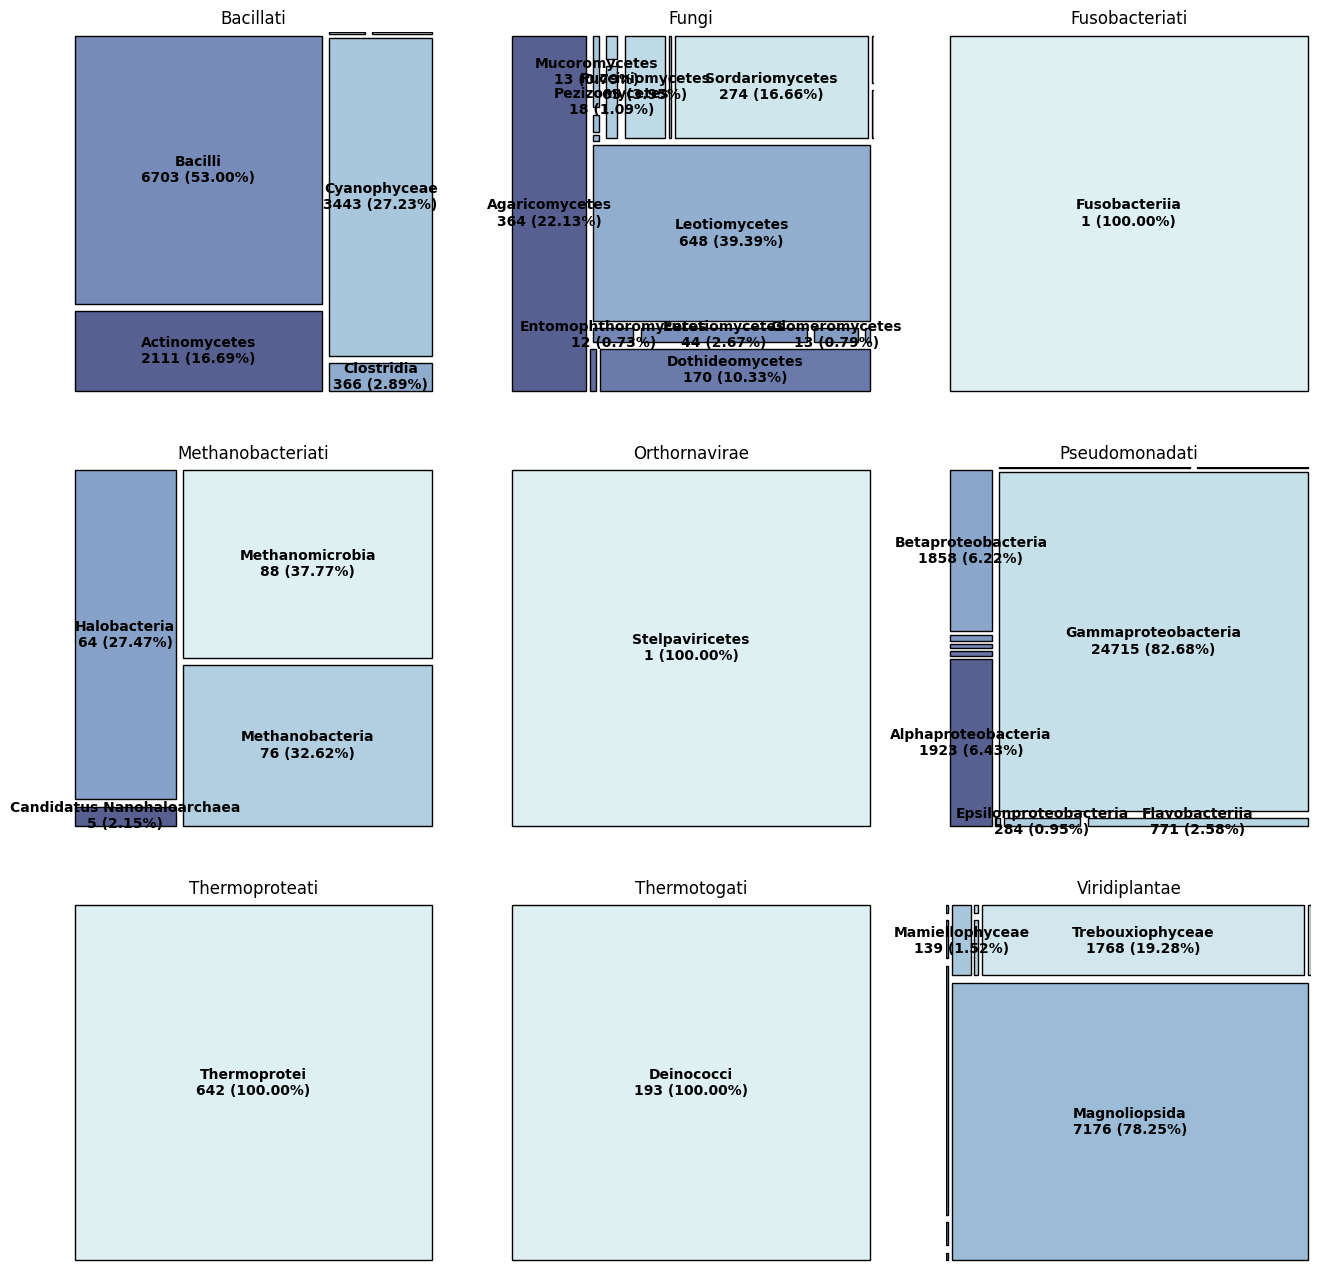

In [92]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16,16))

i = 0 
for kingdom in agg_df["kingdom"].unique():
    if kingdom == "Metazoa":
        continue
    ax = axs.flatten()[i]
    sub_df = agg_df[agg_df["kingdom"] == kingdom]
    n = sub_df["count"].sum()
    labels = []
    for class_val, count in zip(sub_df["class"], sub_df["count"]):
        prevalence = count/n*100
        if prevalence <= 0.5:
            labels.append("")
        else:
            labels.append(f"{class_val}\n{count} ({prevalence:.2f}%)")
    print(labels)
    ax.set_axis_off()
    squarify.plot(
        sizes=sub_df["count"],
        label=labels,
        text_kwargs={
            "color": "black",
            "fontsize": 10,
            "fontweight": "bold"
        },
        pad=True,
        ec="black",
        color=sns.cubehelix_palette(rot=-.2, gamma=.5, reverse=True, n_colors=len(labels)),
        ax=ax
    )
    ax.set_title(kingdom)
    i += 1

plt.show()

In [34]:
kingdom_data = {v:k for k, v in df["kingdom"].value_counts().to_dict().items()}
list(kingdom_data.keys())

[280763, 29891, 12657, 9201, 1645, 642, 233, 193, 1]

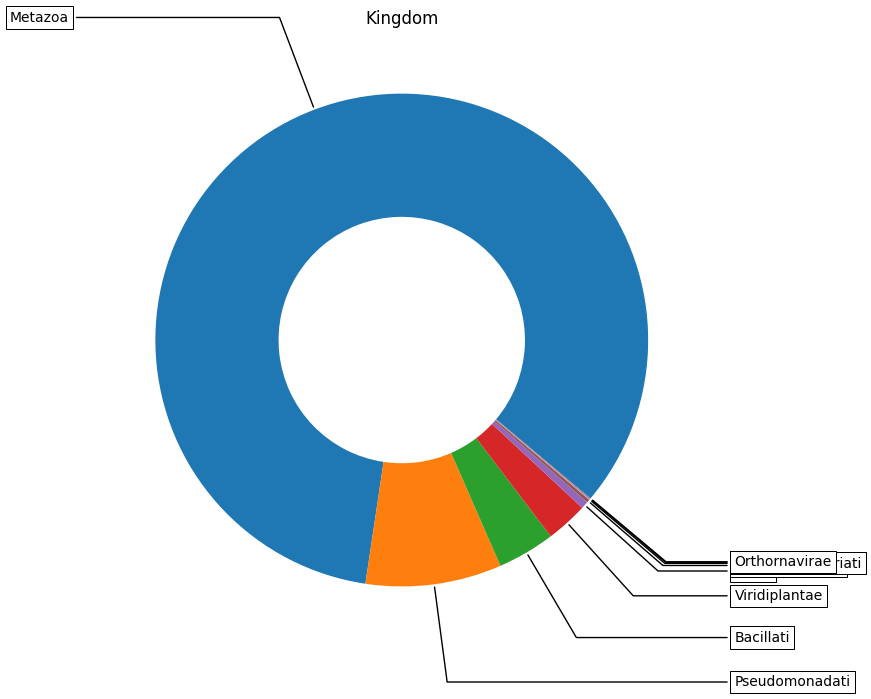

In [11]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))


data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(list(kingdom_data.keys()), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(list(kingdom_data.values())[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Kingdom")

plt.show()

/tmp/ipykernel_743136/2753390463.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/datasets/analysis/../../../../src/utils/visualization_utils.py:119: UserWarning:

FixedFormatter should only be used together with FixedLocator



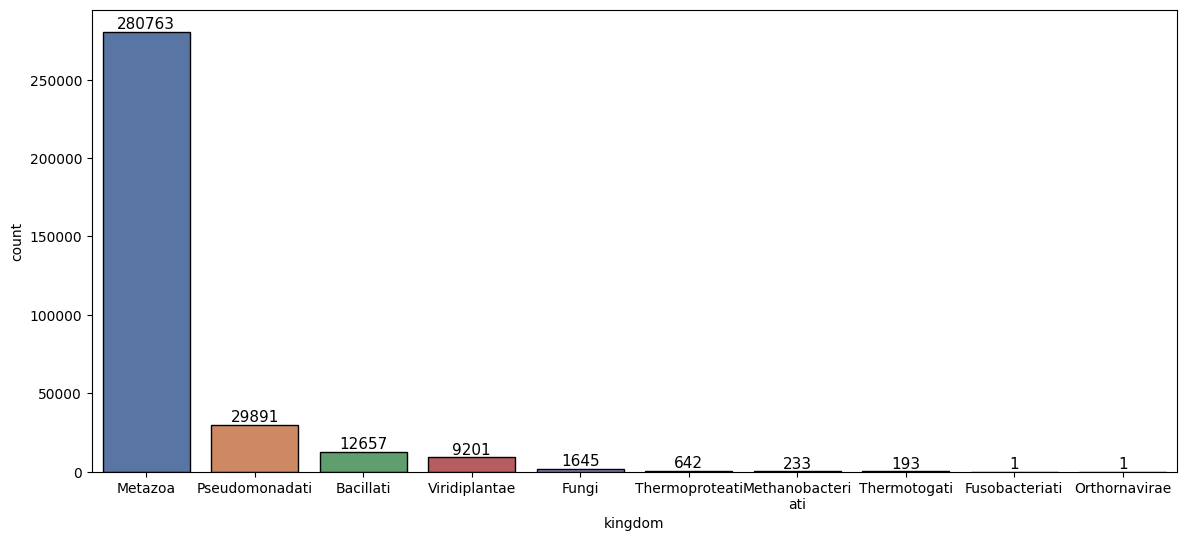

In [12]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(14,6))
ax = sns.barplot(data=df["kingdom"].value_counts().reset_index(), x="kingdom", y="count", fill=True,
                orient="v", palette="deep", errorbar=None, linewidth=1, edgecolor="0")

visualization_utils.wrap_ticklabels(ax, axis="x", label_width=14, break_long_words=True)
for i in ax.containers:
        ax.bar_label(i, fontsize=11, fmt="%.f")

plt.show()

/tmp/ipykernel_743136/3116435830.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/datasets/analysis/../../../../src/utils/visualization_utils.py:119: UserWarning:

FixedFormatter should only be used together with FixedLocator



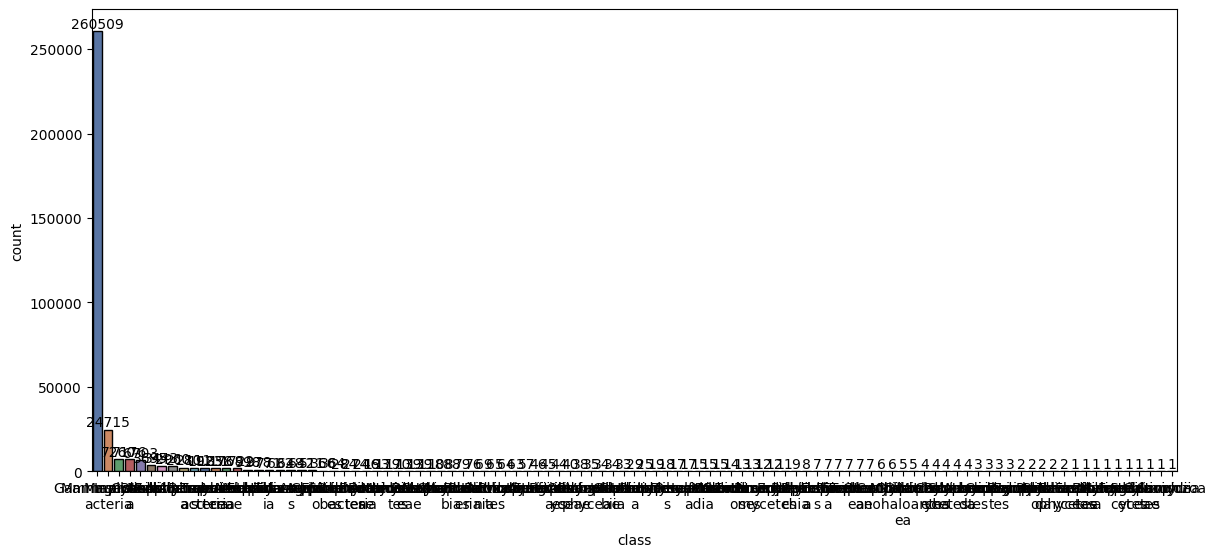

In [13]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(14,6))
ax = sns.barplot(data=df["class"].value_counts().reset_index(), x="class", y="count", fill=True,
                orient="v", palette="deep", errorbar=None, linewidth=1, edgecolor="0")

visualization_utils.wrap_ticklabels(ax, axis="x", label_width=12, break_long_words=True)
for i in ax.containers:
        ax.bar_label(i, fontsize=10, fmt="%.f")

plt.show()